# Data Preparation

In [135]:
import pandas as pd

df = pd.read_csv("archive (3)/cardekho_data.csv")
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [136]:
df.shape

(301, 9)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [138]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [139]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [140]:
missing_values = df.isnull().sum()
missing_values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

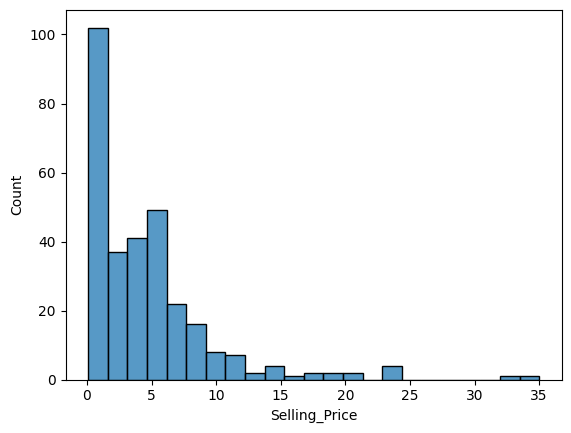

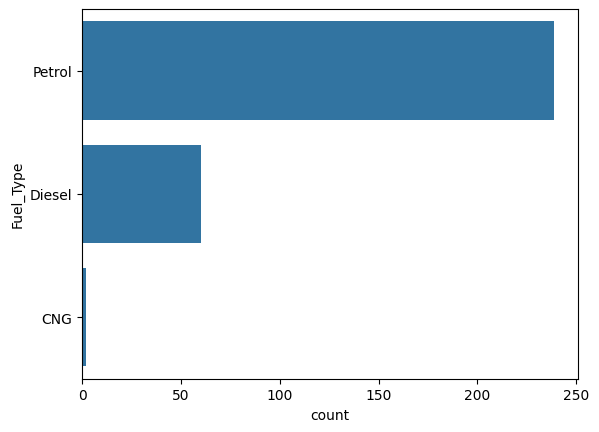

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

#unvariate analysis
sns.histplot(df['Selling_Price'])
plt.show()
sns.countplot(df['Fuel_Type'])
plt.show()

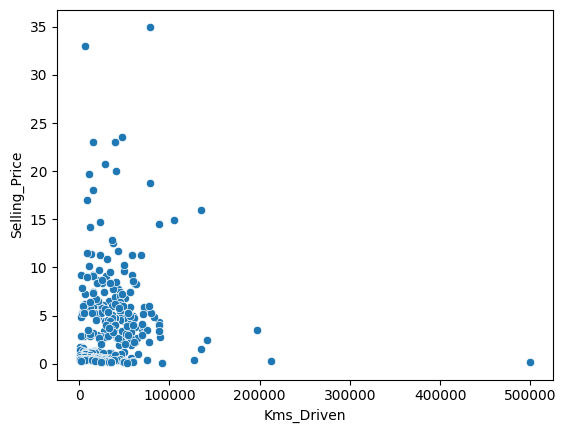

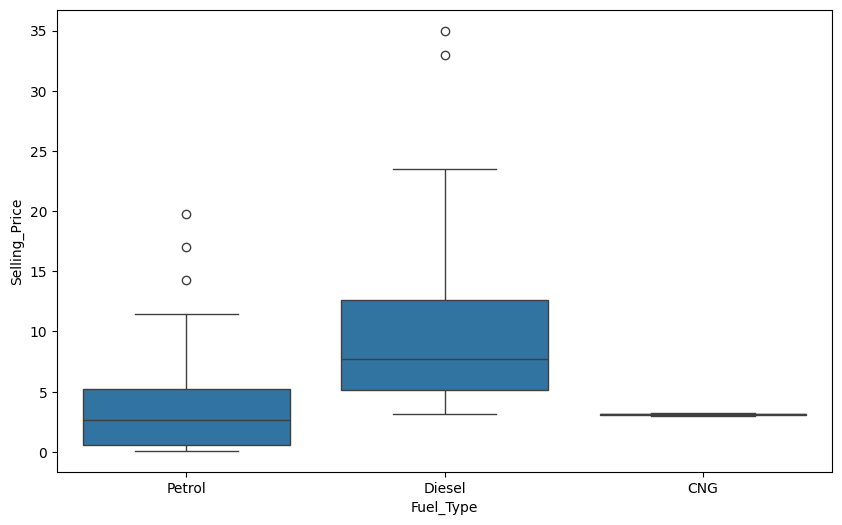

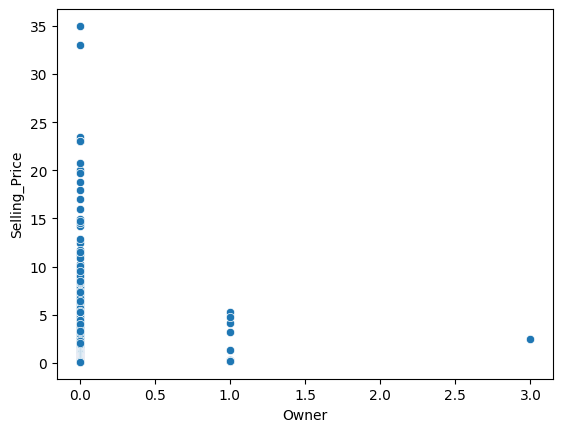

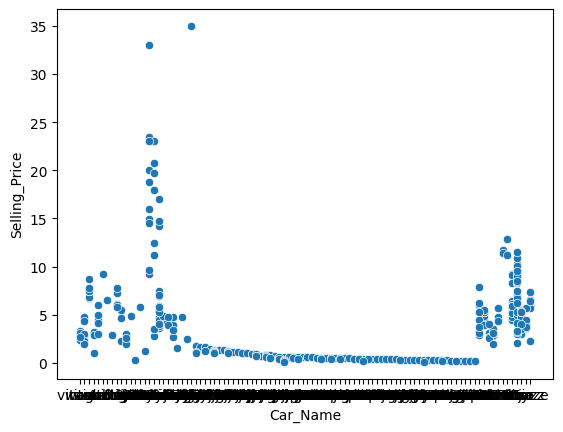

In [142]:
#Bivariate analysis

sns.scatterplot(x='Kms_Driven', y= 'Selling_Price', data = df)
plt.show()
plt.figure(figsize = (10,6))
sns.boxplot(x= "Fuel_Type", y='Selling_Price', data=df)
plt.show()

sns.scatterplot(x= 'Owner', y= 'Selling_Price', data = df)
plt.show()

sns.scatterplot(x= 'Car_Name', y= 'Selling_Price', data = df)
plt.show()

# Feature Engineering

In [143]:
df['Car_Age'] = 2024 - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [144]:
df.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [145]:
df.Owner.unique()

array([0, 1, 3])

In [146]:
df['Price_Difference'] = df['Present_Price'] - df['Selling_Price']
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Price_Difference
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7,2.60


In [147]:
#Calculating Price per each Km
df['Price_per_km'] = df['Selling_Price']/df['Kms_Driven']
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Price_Difference,Price_per_km
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10,2.24,0.000124
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11,4.79,0.000110
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7,2.60,0.001051


# Feature Scaling

In [148]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Selling_Price', 'Present_Price', 'Kms_Driven']] = scaler.fit_transform(df[['Selling_Price','Present_Price', 'Kms_Driven']])

In [149]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Price_Difference,Price_per_km
0,ritz,2014,0.093123,0.057109,0.053053,Petrol,Dealer,Manual,0,10,2.24,0.000124
1,sx4,2013,0.133238,0.099913,0.085085,Diesel,Dealer,Manual,0,11,4.79,0.000110
2,ciaz,2017,0.204871,0.103273,0.012813,Petrol,Dealer,Manual,0,7,2.60,0.001051


# Encoding Categorical Features

In [150]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner' ],drop_first = True)
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Car_Age,Price_Difference,Price_per_km,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1,Owner_3
0,ritz,2014,0.093123,0.057109,0.053053,10,2.24,0.000124,False,True,False,True,False,False
1,sx4,2013,0.133238,0.099913,0.085085,11,4.79,0.000110,True,False,False,True,False,False
2,ciaz,2017,0.204871,0.103273,0.012813,7,2.60,0.001051,False,True,False,True,False,False


In [151]:
# One-hot encode the Car_Brand feature
df = pd.get_dummies(df, columns=['Car_Name'], drop_first=True)

In [152]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Car_Age',
       'Price_Difference', 'Price_per_km', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Seller_Type_Individual',
       ...
       'Car_Name_land cruiser', 'Car_Name_omni', 'Car_Name_ritz',
       'Car_Name_s cross', 'Car_Name_swift', 'Car_Name_sx4', 'Car_Name_verna',
       'Car_Name_vitara brezza', 'Car_Name_wagon r', 'Car_Name_xcent'],
      dtype='object', length=110)

In [153]:
df.head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Car_Age,Price_Difference,Price_per_km,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,...,Car_Name_land cruiser,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent
0,2014,0.093123,0.057109,0.053053,10,2.24,0.000124,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,2013,0.133238,0.099913,0.085085,11,4.79,0.000110,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,2017,0.204871,0.103273,0.012813,7,2.60,0.001051,False,True,False,...,False,False,False,False,False,False,False,False,False,False


# Model Building and Training

In [154]:
from sklearn.model_selection import train_test_split

X = df.drop(['Selling_Price'], axis = 1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 36)


In [155]:
X_train

,Year,Present_Price,Kms_Driven,Car_Age,Price_Difference,Price_per_km,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,...,Car_Name_land cruiser,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent
194,2008,0.005061,0.099099,16,0.587,0.000004,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
106,2014,0.033919,0.032032,10,2.100,0.000082,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
48,2015,0.080082,0.050791,9,1.910,0.000224,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
281,2006,0.078890,0.100012,18,5.500,0.000042,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
15,2016,0.113459,0.085085,8,3.040,0.000180,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2013,0.005061,0.031031,11,0.137,0.000041,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
250,2016,0.143910,0.070939,8,0.700,0.000359,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
161,2014,0.005483,0.045045,10,0.376,0.000020,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
98,2013,0.198201,0.089089,11,11.560,0.000157,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [156]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

# Model Evalution

In [157]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-Squared:", r2)

Mean Squared Error: 0.00022946109449423148
Root Mean Squared Error: 0.015147973280087058
R-Squared: 0.985864475068105


In [158]:
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df.sort_values(by='importance', ascending=False)

,feature,importance
1,Present_Price,0.847048
5,Price_per_km,0.085319
4,Price_Difference,0.015700
8,Seller_Type_Individual,0.011818
0,Year,0.011244
...,...,...
19,Car_Name_Bajaj Avenger Street 220,0.000000
73,Car_Name_alto 800,0.000000
72,Car_Name_Yamaha Fazer,0.000000
65,Car_Name_TVS Sport,0.000000


In [159]:
df.shape

(301, 110)

# Overfitting Detection

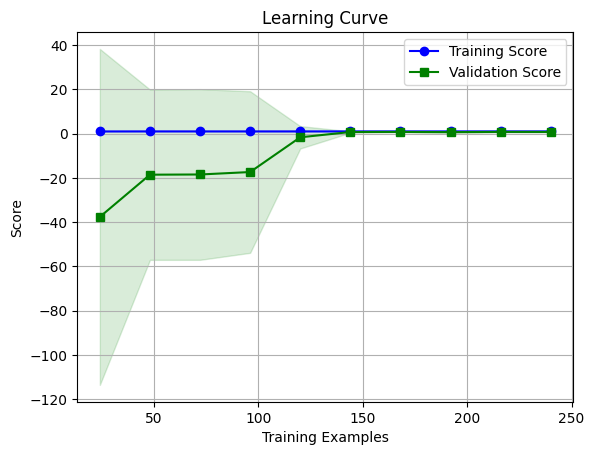

In [160]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='green', marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [161]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [ 0.95821157  0.730608   -0.17395332  0.96789656  0.85850339]
Mean Cross-Validation Score: 0.6682532405863617
